In [205]:
# Day 6
# Single independent feature

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
data=pd.read_csv('/content/height-weight.csv')

In [208]:
data.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [209]:
data.tail()

,Weight,Height
18,76,150
19,87,167
20,45,129
21,56,140
22,72,160


In [210]:
data.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


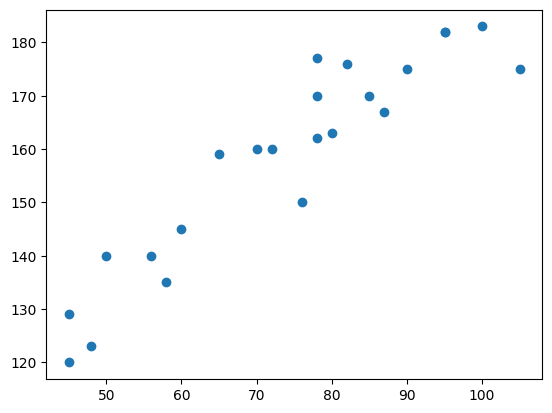

In [211]:
plt.scatter(data['Weight'],data['Height'])

In [212]:
data.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


<Axes: >

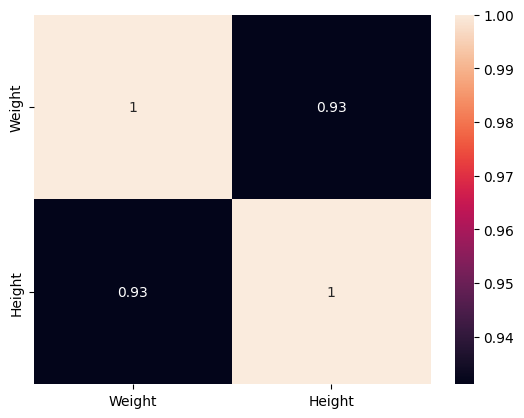

In [213]:
sns.heatmap(data.corr(),annot=True)

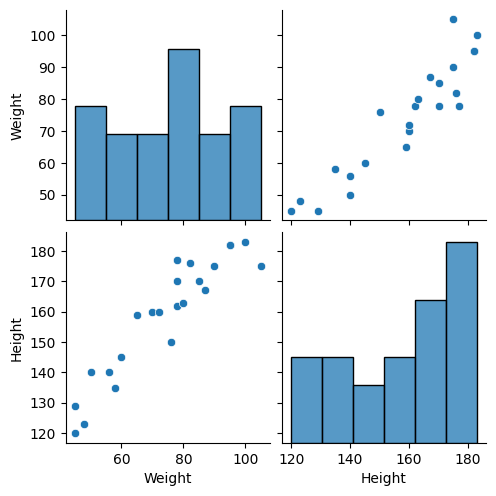

In [214]:
sns.pairplot(data)

In [215]:
x=data[['Weight']]
y=data[['Height']]

In [216]:
x.shape

(23, 1)

In [217]:
y.shape

(23, 1)

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [219]:
s=StandardScaler()

In [220]:
x_train=s.fit_transform(x_train)

In [221]:
x_test=s.transform(x_test)

In [222]:
x_train

array([[-0.94784251],
       [ 1.5145937 ],
       [-0.12703044],
       [-1.41687798],
       [ 1.22144653],
       [ 0.34200503],
       [-0.53743647],
       [-0.24428931],
       [-1.53413685],
       [ 0.22474616],
       [ 0.10748729],
       [ 0.22474616],
       [ 0.92829937],
       [ 0.75241106],
       [-0.83058364],
       [-1.71002515],
       [ 0.22474616],
       [ 1.80774087]])

In [223]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression(n_jobs=-1)

In [224]:
reg.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [225]:
reg.coef_

array([[16.92653463]])

In [226]:
reg.intercept_

array([158.11111111])

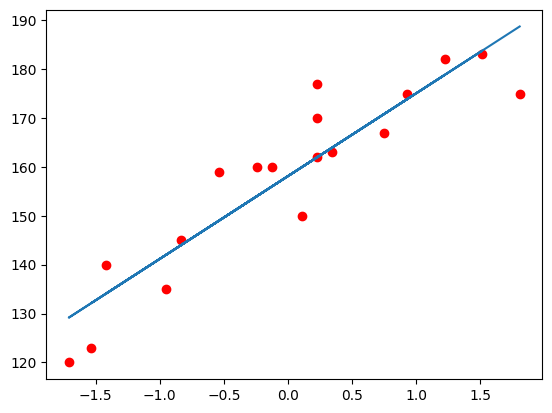

In [227]:
plt.scatter(x_train,y_train,c='red')
plt.plot(x_train,reg.predict(x_train))

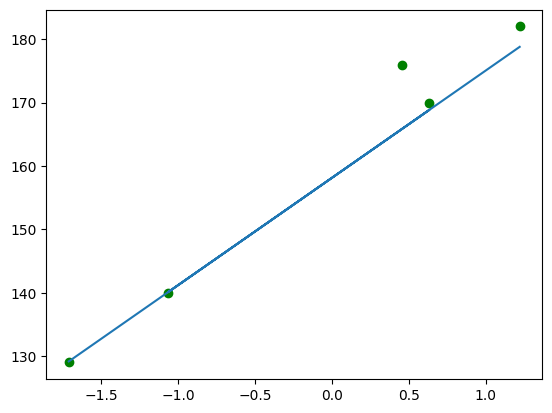

In [228]:
plt.scatter(x_test,y_test,c='green')
plt.plot(x_test,reg.predict(x_test))

In [229]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
mse=mean_squared_error(y_test,reg.predict(x_test))
mae=mean_absolute_error(y_test,reg.predict(x_test))
rmse=np.sqrt(mse)
r2Score=r2_score(y_test,reg.predict(x_test))
print(mse)
print(mae)
print(rmse)
print(r2Score)

22.795111961354205
2.943216949404291
4.774422683566486
0.9481740815720394


In [230]:
# Multiple independent feature
data1=pd.read_csv('/content/economic_index.csv')
data1.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [231]:
data1=data1.drop(['Unnamed: 0','year','month'],axis=1)
data1

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [232]:
data1.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


In [233]:
x1=data1.drop(['index_price'], axis=1)
y1=data1['index_price']
print(x1)

    interest_rate  unemployment_rate
0            2.75                5.3
1            2.50                5.3
2            2.50                5.3
3            2.50                5.3
4            2.50                5.4
5            2.50                5.6
6            2.50                5.5
7            2.25                5.5
8            2.25                5.5
9            2.25                5.6
10           2.00                5.7
11           2.00                5.9
12           2.00                6.0
13           1.75                5.9
14           1.75                5.8
15           1.75                6.1
16           1.75                6.2
17           1.75                6.1
18           1.75                6.1
19           1.75                6.1
20           1.75                5.9
21           1.75                6.2
22           1.75                6.2
23           1.75                6.1


In [234]:
data1.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


<Axes: >

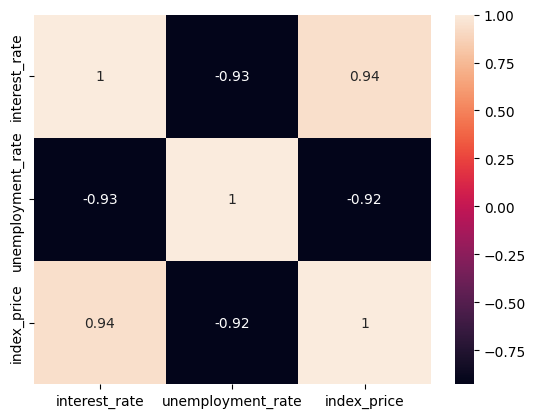

In [235]:
sns.heatmap(data1.corr(),annot=True)

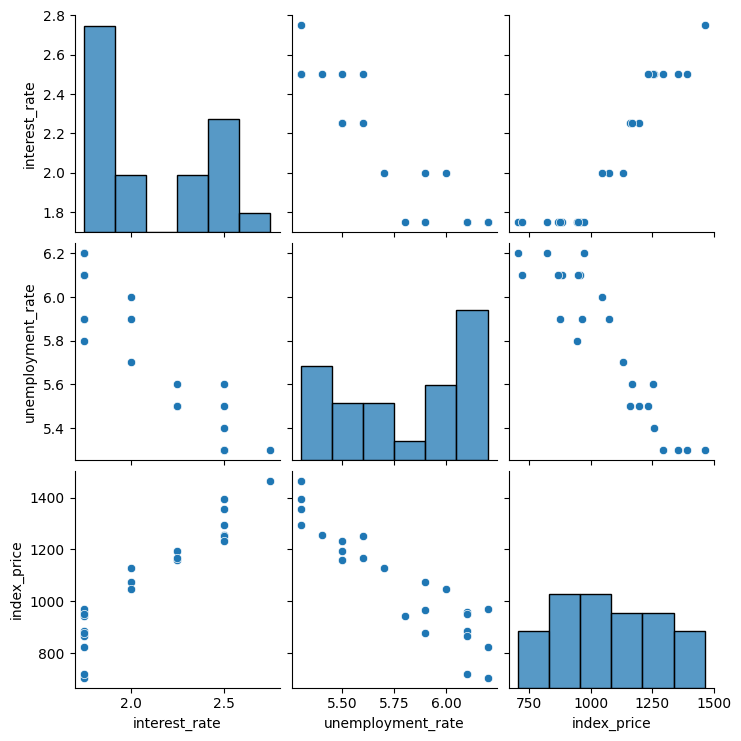

In [236]:
sns.pairplot(data1)

<Axes: xlabel='interest_rate', ylabel='index_price'>

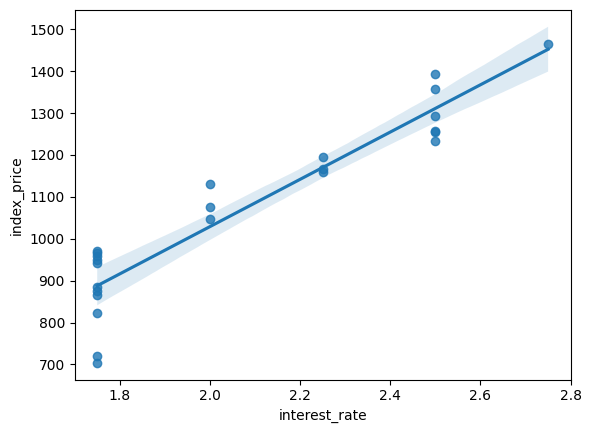

In [237]:
# regression plot for individual features with target
sns.regplot(x=data1['interest_rate'],y=data1['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

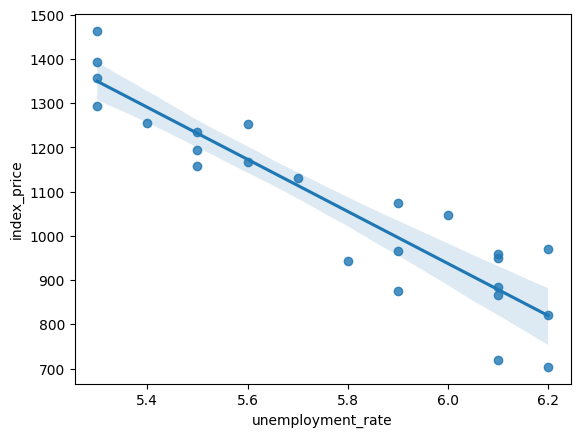

In [238]:
sns.regplot(x=data1['unemployment_rate'],y=data1['index_price'])

In [239]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=0)

In [240]:
x1_train=s.fit_transform(x1_train)
x1_test=s.transform(x1_test)

In [241]:
multireg=LinearRegression(n_jobs=-1)

In [242]:
multireg.fit(x1_train,y1_train)

LinearRegression(n_jobs=-1)

In [243]:
multireg.coef_

array([132.27044464, -67.29146667])

In [244]:
multireg.intercept_

np.float64(1102.842105263158)

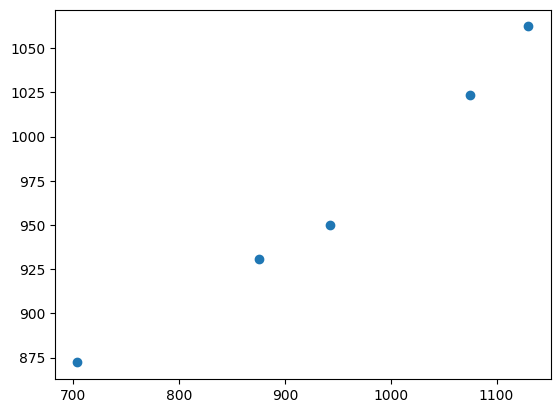

In [245]:
plt.scatter(y1_test,multireg.predict(x1_test))

In [246]:
res=y1_test-multireg.predict(x1_test)
print(res)

11     51.677529
10     67.709667
22   -168.235166
14     -7.170890
20    -54.686959
Name: index_price, dtype: float64


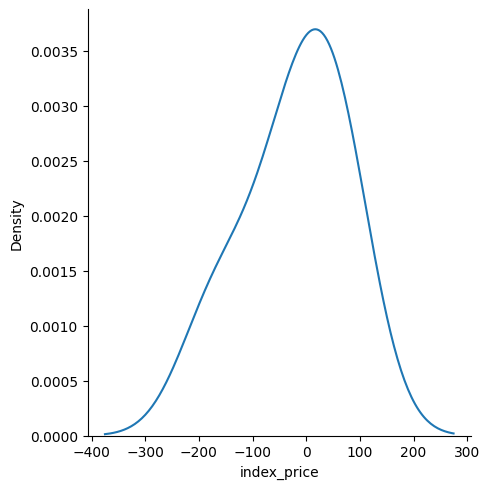

In [247]:
sns.displot(res,kind='kde')

[ 0.87438759  2.51342297  1.27330384  2.11408523  0.58736037  0.90075368
  2.09976837  0.24169742  1.9783326   0.11079651  2.55595667  0.79127108
  2.5890214  -0.77003447 -0.01486518 -1.57257101 -0.18591329 -1.53145328
  0.32652464 -2.31048738 -0.60697533 -0.22431972 -1.13147033  2.74413587
 -0.41794648  2.90910173  2.33226565  1.72607313 -2.71195333 -1.78747775
 -1.69770327  2.57186258 -2.76538889 -1.32142731  1.46381387  1.99943262
 -1.12484376  0.96323817 -2.4126793  -1.20021221 -1.36715946 -0.2152245
  0.98255478 -2.98080982  1.2795765   0.6928416   2.99050687 -2.22682855
  0.87687307  2.18795457 -2.62975389  0.62596089  2.62608204  2.9022321
 -0.22813682  1.54494461 -2.39698687 -1.80293855 -2.28038091 -0.91286313
  0.97466853  2.18295718  1.01959931 -2.61649692 -1.53277923 -0.79023531
  1.45817969  0.44502171  2.14129232  0.46454471  0.95477007 -1.18529598
 -0.79642416 -1.39211366  2.61474504  2.10257479  0.31226866 -2.11279526
 -1.60220885 -1.43387751  0.47693486  1.15827477  0.4

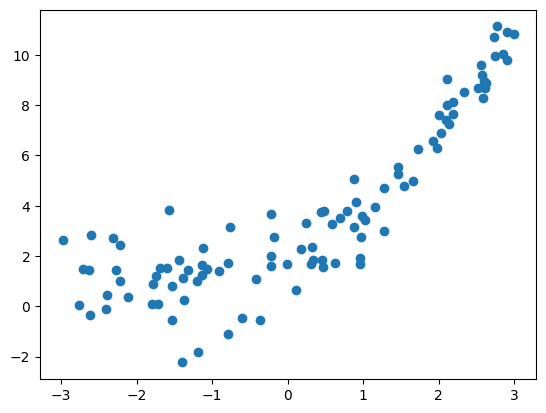

In [248]:
# polynomial regression

xp=6*np.random.rand(100)-3
yp=0.5*xp**2+1.5*xp+2+np.random.randn(100)
plt.scatter(xp,yp)
print(xp)
print(yp)
print(xp.shape)
print(yp.shape)

In [249]:
xp_train,xp_test,yp_train,yp_test=train_test_split(xp,yp,test_size=0.2,random_state=0)

In [250]:
xp_train=s.fit_transform(xp_train.reshape(-1, 1))
xp_test=s.transform(xp_test.reshape(-1, 1))

In [251]:
reg1=LinearRegression(n_jobs=-1)
reg1.fit(xp_train,yp_train)

LinearRegression(n_jobs=-1)

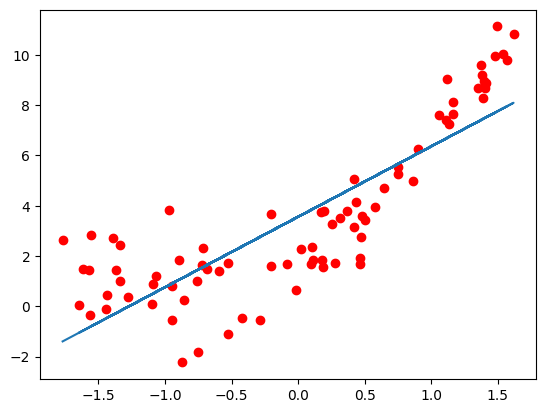

In [252]:
plt.scatter(xp_train,yp_train,c='red')
plt.plot(xp_train,reg1.predict(xp_train.reshape(-1, 1)))

In [253]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)

In [254]:
x_train_poly=poly.fit_transform(xp_train)
x_test_poly=poly.transform(xp_test)

In [255]:
x_train_poly.shape

(80, 3)

In [256]:
reg2=LinearRegression(n_jobs=-1)

In [257]:
x_train_poly.shape

(80, 3)

In [258]:
reg2.fit(x_train_poly,yp_train)

LinearRegression(n_jobs=-1)

In [259]:
yp_pred=reg2.predict(x_test_poly)
yp_pred.shape

(20,)

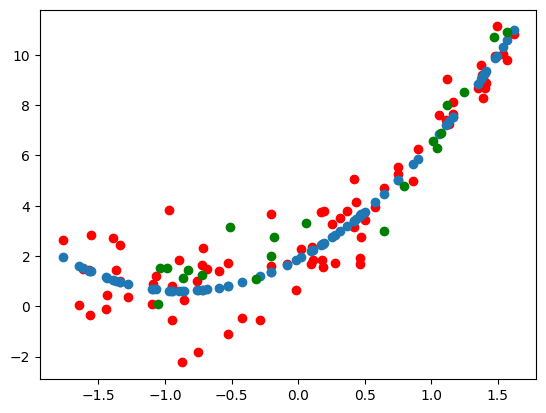

In [260]:
plt.scatter(xp_train,yp_train,c='red')
plt.scatter(xp_train,reg2.predict(x_train_poly))
plt.scatter(xp_test,yp_test,c='green')

In [261]:
rsc=r2_score(yp_test,yp_pred)
rsc

0.921470331013266

In [262]:
mean_sq_err=mean_squared_error(yp_test,yp_pred)
mean_sq_err

0.8435933831051878

In [263]:
mean_ab_err=mean_absolute_error(yp_test,yp_pred)
mean_ab_err

0.7450919492136331

In [264]:
root_mn_sq_err=np.sqrt(mean_sq_err)
root_mn_sq_err

np.float64(0.9184733981478113)

## Function for ploynomial regression

In [271]:
from sklearn.pipeline import Pipeline
def poly_regression(degree):
  x_new=np.linspace(-3,3,200).reshape(200,1)
  poly_features=PolynomialFeatures(degree=degree,include_bias=True)
  lin_reg=LinearRegression()
  poly_regression=Pipeline([
      ("poly_features",poly_features),
      ("lin_reg",lin_reg)
  ])
  poly_regression.fit(xp_train,yp_train)
  y_pred_new=poly_regression.predict(x_new)
  # plotting
  plt.plot(x_new,y_pred_new,'r',label="Degree "+str(degree),linewidth=2)
  plt.plot(xp_train,yp_train,'b.',linewidth=3)
  plt.plot(xp_test,yp_test,'g.',linewidth=3)
  plt.legend(loc='upper left')
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.axis([-4,4,0,10])
  plt.show()


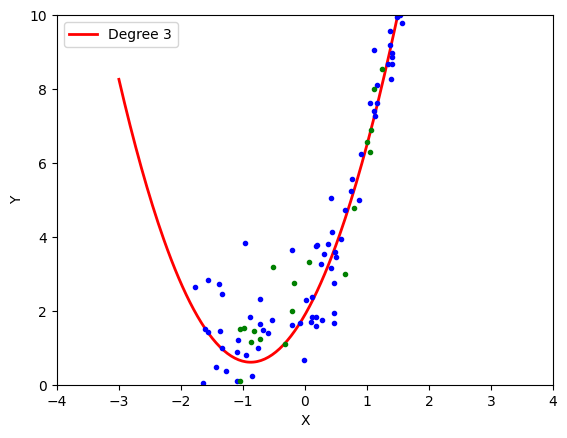

In [276]:
poly_regression(3)